In [1]:
import numpy as np
import pandas as pd
from scipy import stats
#from IPython.display import Markdown

# Q7.1
The criterion for issuing a smog alert is established at greater than 7 ppm of a
particular pollutant. Samples collected from 16 stations in a certain city give a
x value of 7.84 ppm with a standard deviation of s = 2.01 ppm. Do these findings
indicate that the smog alert criterion has been exceeded? State clearly your
null and alternative hypotheses and choice of test size (alpha level).

## A7.1

$H_0: \mu = 7$  
$H_A: \mu \ne 7$  
$\alpha = 0.05$

In [5]:
alpha = 0.05
n = 16
mean = 7.84
s = 2.01

se = s / np.sqrt(n)
z = (mean - 7) / se

t = stats.t(n-1)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.4})")

Fail to reject null (p-value = 0.1153)


# Q7.3
In a study of saliva cotinine, seven subjects, all of whom had abstained from
smoking for a week, were asked to smoke a single cigarette. The cotinine levels
at 12 and 24 hours after smoking are given in Table E7.3. Test to compare the
mean cotinine levels at 12 and 24 hours after smoking. State clearly your null
and alternative hypotheses and choice of test size.

In [6]:
columns = [
    ['Cotinine levels (mmol/L)', 'Cotinine levels (mmol/L)'],
    ['After 12 hours', 'After 24 hours'],
]

data = [
    [73, 24],
    [58, 27],
    [67, 49],
    [93, 59],
    [33, 0],
    [18, 11],
    [147, 43],
]

df = pd.DataFrame(data=data, columns=columns)
df.index = df.index.rename('Subject')

df

Cotinine levels (mmol/L)               
                  After 12 hours After 24 hours
Subject                                        
0                             73             24
1                             58             27
2                             67             49
3                             93             59
4                             33              0
5                             18             11
6                            147             43

## A7.3

$H_0: \mu_{12} - \mu_{24} = 0$  
$H_A: \mu_{12} - \mu_{24} \ne 0$  
$\alpha = 0.05$

In [29]:
diff = df.iloc[:, 0] - df.iloc[:, 1]
n = len(diff)
mean = diff.mean()
s = diff.std()

se = s / np.sqrt(n)
z = mean / se

t = stats.t(n-1)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.4})")

Reject null (p-value = 0.01595)


# Q7.4
Dentists often make many people nervous. To see if such nervousness elevates
blood pressure, the systolic blood pressures of 60 subjects were measured in a
dental setting, then again in a medical setting. Data for 60 matched pairs
(dental–medical) are summarized as follows:
- mean = 4.47
- standard deviation = 8.77

Test to compare the means blood pressure under two different settings. Name the
test and state clearly your null and alternative hypotheses and choice of test size.

## A7.4

In [34]:
n = 60
mean = 4.47
s = 8.77

se = s / np.sqrt(n)
z = mean / se

t = stats.t(n-1)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.4})")

Reject null (p-value = 0.0002125)


# Q7.7
Data in epidemiologic studies are sometimes self‐reported. Screening data
from the hypertension detection and follow‐up program in Minneapolis,
Minnesota (1973–1974) provided an opportunity to evaluate the accuracy of
self‐reported height and weight (see Example 7.4). Table 7.3 gives the
percentage discrepancy between self‐reported and measured height:

$\large{x = \frac{self-reported\hspace{1mm}height\hspace{1mm}-\hspace{1mm}measured\hspace{1mm}height}{measured\hspace{1mm}height} \times 100\%}$

Example 7.4 was focused on the sample of men with a high school education.
Using the same procedure, investigate the difference between self‐reported
height and measured height among:  
(a) Men with a college education.  
(b) Women with a high school education.  
(c) Women with a college education.

In each case, name the test and state clearly your null and alternative hypotheses
and choice of test size. Also, compare the mean difference in percent discrepancy
between:  
(d) Men with different education levels.  
(e) Women with different education levels.  
(f) Men versus women at each educational level.

In each case, name the test and state clearly your null and alternative hypotheses
and choice of test size.

In [35]:
index = ['≤ High school', '≥ College']

columns = [
    ['Men'] * 3 + ['Women'] * 3,
    ['n', 'Mean', 'SD'] * 2,
]

data = [
    [476, 1.38, 1.53, 323, 0.66, 1.53],
    [192, 1.04, 1.31, 62, 0.41, 1.46],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Education')

df

Men             Women            
                 n  Mean    SD     n  Mean    SD
Education                                       
≤ High school  476  1.38  1.53   323  0.66  1.53
≥ College      192  1.04  1.31    62  0.41  1.46

## A7.7

In [71]:
combs = [
    ['(a)', 'Men', '≥ College'],
    ['(b)', 'Women', '≤ High school'],
    ['(c)', 'Women', '≥ College'],
]

for q, gender, education in combs:
    subdf = subdf = df.loc[education, gender]
    n = subdf['n']
    mean = subdf['Mean']
    s = subdf['SD']

    se = s / np.sqrt(n)
    z = mean / se

    t = stats.t(n-1)
    pval = t.cdf(-z) + t.sf(z)

    print(f"{q} p-value = {pval :.4} (t-score = {z :.3})")

(a) p-value = 4.06e-22 (t-score = 11.0)
(b) p-value = 1.191e-13 (t-score = 7.75)
(c) p-value = 0.03078 (t-score = 2.21)


In [70]:
combs = [
    ['(d)', ('≤ High school', 'Men'), ('≥ College', 'Men')],
    ['(e)', ('≤ High school', 'Women'), ('≥ College', 'Women')],
    ['(f)', ('≤ High school', 'Men'), ('≤ High school', 'Women')],
    ['   ', ('≥ College', 'Men'), ('≥ College', 'Women')],
]

for q, group1, group2 in combs:
    n1 = df.loc[group1]['n']
    n2 = df.loc[group2]['n']
    mean1 = df.loc[group1]['Mean']
    mean2 = df.loc[group2]['Mean']
    s1 = df.loc[group1]['SD']
    s2 = df.loc[group2]['SD']

    s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
    se = s_p * np.sqrt((1 / n1) + (1 / n2))
    z = abs(mean1 - mean2) / se

    t = stats.t(n1 + n2 - 2)
    pval = t.cdf(-z) + t.sf(z)
    comparison = f"{group1[0]} {group1[1]} vs. {group2[0]} {group2[1]}"
    print(f"{q} {comparison}:\n        p-value = {pval :.3} (t-score = {z :.3})")

(d) ≤ High school Men vs. ≥ College Men:
        p-value = 0.00701 (t-score = 2.7)
(e) ≤ High school Women vs. ≥ College Women:
        p-value = 0.236 (t-score = 1.19)
(f) ≤ High school Men vs. ≤ High school Women:
        p-value = 1.19e-10 (t-score = 6.53)
    ≥ College Men vs. ≥ College Women:
        p-value = 0.00155 (t-score = 3.2)


# Q7.9
The Australian study of Example 7.6 also provided these data on monocular
acuity (expressed in log scale) for two female groups of subjects:  
(1) Australian females of European origin  

$n_1 = 63$  
$\bar{x_1} = -0.13$  
$s_1 = 0.17$

(2) Australian females of Aboriginal origin

$n_2 = 54$  
$\bar{x_2} = -0.24$  
$s_2 = 0.18$

Do these indicate a racial variation among women? Name your test and state
clearly your null and alternative hypotheses and choice of test size.

## A7.9

$H_0: \mu_1 = \mu_2$  
$H_A: \mu_1 \ne \mu_2$  
$\alpha = 0.05$

In [83]:
n1 = 63
n2 = 54
mean1 = -0.13
mean2 = -0.24
s1 = 0.17
s2 = 0.18

s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
se = s_p * np.sqrt((1 / n1) + (1 / n2))
z = abs(mean1 - mean2) / se

t = stats.t(n1 + n2 - 2)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.2e}, t-score = {z :.3})")

Reject null (p-value = 9.41e-04, t-score = 3.4)


# Q7.12
In a trial to compare a stannous fluoride dentifrice (A) with a commercially
available fluoride‐free dentifrice (D), 270 children received A and 250
received D for a period of 3 years. The number x of DMFS increments (i.e.,
the number of new decayed, missing, and filled tooth surfaces) was obtained
for each child. Results were:

Dentifrice A:  
$\bar{x_A} = 9.78$  
$s_A = 7.51$

Dentifrice D:  
$\bar{x_D} = 12.83$  
$s_D = 8.31$

Do the results provide strong enough evidence to suggest a real effect of
fluoride in reducing the mean DMFS?

## A7.12

$H_0:$ No difference in mean DMFS between groups A and D  
$H_A:$ A difference in mean DMFS between groups A and D  
$alpha = 0.05$

In [85]:
n1 = 270
n2 = 250
mean1 = 9.78
mean2 = 12.83
s1 = 7.51
s2 = 8.31

s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
se = s_p * np.sqrt((1 / n1) + (1 / n2))
z = abs(mean1 - mean2) / se

alpha = 0.05
t = stats.t(n1 + n2 - 2)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.2e}, t-score = {z :.3})")

Reject null (p-value = 1.34e-05, t-score = 4.4)


# Q7.13
An experiment was conducted at the University of California–Berkeley to
study the psychological environment’s effect on the anatomy of the brain. A
group of 19 rats was randomly divided into two groups. Twelve animals in the
treatment group lived together in a large cage, furnished with playthings that
were changed daily, while animals in the control group lived in isolation with
no toys. After a month the experimental animals were killed and dissected.
Table E7.13 gives the cortex weights (the thinking part of the brain) in milligrams.
Use the two‐sample t test to compare the means of the two groups and
draw appropriate conclusions.

In [87]:
treatment = np.array([707, 696, 740, 712, 745, 708, 652, 749, 649, 690, 676, 699])
control = np.array([669, 650, 651, 627, 656, 642, 698])

## A7.13

In [88]:
n1 = len(treatment)
n2 = len(control)
mean1 = treatment.mean()
mean2 = control.mean()
s1 = treatment.std(ddof=1)
s2 = control.std(ddof=1)

s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
se = s_p * np.sqrt((1 / n1) + (1 / n2))
z = abs(mean1 - mean2) / se

alpha = 0.05
t = stats.t(n1 + n2 - 2)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.2e}, t-score = {z :.3})")

Reject null (p-value = 4.67e-03, t-score = 3.25)


There is a statistically significant difference in cortex weights between the two groups of mice.

# Q7.14
Depression is one of the most commonly diagnosed conditions among hospitalized
patients in mental institutions. The occurrence of depression was determined
during the summer of 1979 in a multiethnic probability sample of 1000 adults in
Los Angeles County, as part of a community survey of the epidemiology of
depression and help‐seeking behavior. The primary measure of depression was
the CES‐D scale developed by the Center for Epidemiologic Studies. On a scale
of 0–60, a score of 16 or higher was classified as depression. Table E7.14 gives
the average CES‐D score for the two genders. Use a t test to compare the males
versus the females and draw appropriate conclusions.

In [95]:
index = ['Male', 'Female']

columns = ['Cases', 'x̄', 's']

data = [
    [412, 7.6, 7.5],
    [588, 10.4, 10.3],
]

df = pd.DataFrame(data=data, index=index, columns=columns)

df

,Cases,x̄,s
Male,412,7.6,7.5
Female,588,10.4,10.3


## A7.14

In [98]:
n1 = df.loc['Male', 'Cases']
n2 = df.loc['Female', 'Cases']
mean1 = df.loc['Male', 'x̄']
mean2 = df.loc['Female', 'x̄']
s1 = df.loc['Male', 's']
s2 = df.loc['Female', 's']

s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
se = s_p * np.sqrt((1 / n1) + (1 / n2))
z = abs(mean1 - mean2) / se

alpha = 0.05
t = stats.t(n1 + n2 - 2)
pval = t.cdf(-z) + t.sf(z)
result = "Reject null" if pval < alpha else "Fail to reject null"

print(f"{result} (p-value = {pval :.2e}, t-score = {z :.3})")

Reject null (p-value = 2.81e-06, t-score = 4.71)


There is a statistically significant difference in CES-D scores between males and females.

# Q7.16
The following data are taken from a study that compares adolescents who
have bulimia to healthy adolescents with similar body compositions and levels
of physical activity. Table E7.16 provides measures of daily caloric intake
(kcal/kg) for random samples of 23 bulimic adolescents and 15 healthy ones.
Use the Wilcoxon test to compare the two populations.

In [145]:
bulimic = np.array([
    15.9, 17.0, 18.9, 16.0, 17.6, 19.6, 16.5, 28.7, 21.5, 18.9, 28.0, 24.1,
    18.4, 25.6, 23.6, 18.1, 25.2, 22.9, 30.9, 25.1, 21.6, 29.2, 24.5
])

healthy = np.array([
    30.6, 40.8, 25.7, 37.4, 25.3, 37.1, 24.5, 30.6,
    20.7, 33.2, 22.4, 33.7, 23.1, 36.6, 23.8
])

## A7.16

In [148]:
df = pd.DataFrame()
df['Intake'] = bulimic
df['Group'] = 'bulimic'

df2 = pd.DataFrame()
df2['Intake'] = healthy
df2['Group'] = 'healthy'

df = df.append(df2, ignore_index=True)
df['Rank'] = df['Intake'].rank()

R = df[df['Group'] == 'bulimic']['Rank'].sum()
n1 = df[df['Group'] == 'bulimic'].shape[0]
n2 = df[df['Group'] == 'healthy'].shape[0]
mean_R = n1 * (n1 + n2 + 1) / 2
std_R = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

z = abs(R - mean_R) / std_R
pval = stats.norm.cdf(-z) + stats.norm.sf(z)
print(f"p-value = {pval :.3}, z-score = {z :.3}")

p-value = 0.000917, z-score = 3.31


# Q7.19
Four different brands of margarine were analyzed to determine the level of
some unsaturated fatty acids (as a percentage of fats; Table E7.19). Test to
compare the four groups simultaneously. Name your test and state clearly
your null and alternative hypotheses and choice of test size.

In [174]:
A = np.array([13.5, 13.4, 14.1, 14.2])
B = np.array([13.2, 12.7, 12.6, 13.9])
C = np.array([16.8, 17.2, 16.4, 17.3, 18.0])
D = np.array([18.1, 17.2, 18.7, 18.4])

## A7.19

Test: one-way ANOVA  
$H_0:$ Mean of all groups are equal  
$H_A:$ There is at least one pair of groups with different mean  
$\alpha = 0.05$

In [191]:
combined = np.concatenate([A, B, C, D])
mean = combined.mean()
n = combined.shape[0]
k = 4

SST = ((combined - mean) ** 2).sum()

SSW = 0
for X in [A, B, C, D]:
    SSW += (X.shape[0] - 1) * X.var(ddof=1)

SSB = SST - SSW
MSW = SSW / (n - k)
MSB = SSB / (k - 1)
F = MSB / MSW

pval = stats.f(k-1, n-k).sf(F)
print(f"p-value = {pval :.3}, F-score = {F :.4}")

p-value = 1.67e-08, F-score = 76.23


# Q7.21
A study was conducted to investigate the risk factors for peripheral arterial
disease among persons 55–74 years of age. Table E7.21 provides data on LDL
cholesterol levels (mmol/L) from four different subgroups of subjects. Test to
compare the four groups simultaneously. Name your test and state clearly
your null and alternative hypotheses and choice of test size.

In [227]:
index = [
    '1. Patients with intermittent claudication',
    '2. Major asymptotic disease cases',
    '3. Minor asymptotic disease cases',
    '4. Those with no disease',
]

columns = ['n', 'x̄', 's']

data = [
    [73, 6.22, 1.62],
    [105, 5.81, 1.43],
    [240, 5.77, 1.24],
    [1080, 5.47, 1.31],
]

df = pd.DataFrame(data=data, index=index, columns=columns)
df.index = df.index.rename('Group')

df

,n,x̄,s
Group,,,
1. Patients with intermittent claudication,73,6.22,1.62
2. Major asymptotic disease cases,105,5.81,1.43
3. Minor asymptotic disease cases,240,5.77,1.24
4. Those with no disease,1080,5.47,1.31


## A7.21

Test: one-way ANOVA  
$H_0:$ Mean of all groups are equal  
$H_A:$ There is at least one pair of groups with different mean  
$\alpha = 0.05$

In [228]:
n = df['n'].sum()
k = 4
mean = (df['n'] * df['x̄']).sum() / n

SSW = ((df['n'] - 1) * df['s'] ** 2).sum()
SSB = (df['n'] * (df['x̄'] - mean) ** 2).sum()
MSW = SSW / (n - k)
MSB = SSB / (k - 1)
F = MSB / MSW

pval = stats.f(k-1, n-k).sf(F)
print(f"p-value = {pval :.3}, F-score = {F :.4}")

p-value = 4.62e-07, F-score = 10.87


# Q7.23
When a patient is diagnosed as having cancer of the prostate, an important
question in deciding on treatment strategy is whether or not the cancer has
spread to the neighboring lymph nodes. The question is so critical in prognosis
and treatment that it is customary to operate on the patient (i.e., perform
a laparotomy) for the sole purpose of examining the nodes and removing
tissue samples to examine under the microscope for evidence of cancer.
However, certain variables that can be measured without surgery are predictive
of the nodal involvement. The purpose of the study presented here was to examine the data for 53 prostate cancer patients receiving surgery, to determine
which of five preoperative variables are predictive of nodal involvement
(see Table E2.32). For each of the 53 patients, there are two continuous
independent variables: age at diagnosis and level of serum acid phosphatase
(×100; called “acid”); and three binary variables: x‐ray reading, pathology
reading (grade) of a biopsy of the tumor obtained by needle before surgery,
and a rough measure of the size and location of the tumor (stage) obtained by
palpation with the fingers via the rectum. In addition, the sixth column presents
the findings at surgery– the primary outcome of interest, which is binary,
a value of 1 denoting nodal involvement, and a value of 0 denoting no nodal
involvement found at surgery. The three binary factors have been investigated
previously; this exercise is focused on the effects of the two continuous factors
(age and acid phosphatase). Test to compare the group with nodal involvement
and the group without, using:

(a) The two‐sample t test.  
(b) Wilcoxon’s rank‐sum test.

In [2]:
df = pd.read_csv('assets/nodes.txt', sep=' & ', engine='python')

print(f"df num rows: {df.shape[0]}")
df.head()

df num rows: 53


,Xray,Grade,Stage,Age,Acid,Nodes
0,0,1,1,64,40,0
1,0,0,1,63,40,0
2,1,0,0,65,46,0
3,0,1,0,67,47,0
4,0,0,0,66,48,0


The three binary factors have been investigated previously; this exercise is focused on the effects of the two continuous factors (age and acid phosphatase). Test to compare the group with nodal involvement and the group without, using:

(a) The two‐sample t test.  
(b) Wilcoxon’s rank‐sum test.

## A7.23

In [34]:
print("(a) Two sample t-test:")
for factor in ['Age', 'Acid']:
    group1 = df[df['Nodes'] == 0][factor]
    group2 = df[df['Nodes'] == 1][factor]

    n1 = len(group1)
    n2 = len(group2)
    mean1 = group1.mean()
    mean2 = group2.mean()
    s1 = group1.std()
    s2 = group2.std()

    s_p = np.sqrt(((n1 -1) * s1 ** 2 + (n2 - 1) * s2 ** 2) / (n1 + n2 - 2))
    se = s_p * np.sqrt((1 / n1) + (1 / n2))
    z = abs(mean1 - mean2) / se

    alpha = 0.05
    t = stats.t(n1 + n2 - 2)
    pval = t.cdf(-z) + t.sf(z)
    result = "Reject null" if pval < alpha else "Fail to reject null"

    print(f"      {factor :4}: p-value = {pval :.4f}, t-score = {z :.4}")

print("(b) Wilcoxon rank-sum test:")
for factor in ['Age', 'Acid']:
    subdf = df[[factor, 'Nodes']].copy()
    subdf['Rank'] = subdf[factor].rank()

    R = subdf[subdf['Nodes'] == 0]['Rank'].sum()
    n1 = subdf[subdf['Nodes'] == 0].shape[0]
    n2 = subdf[subdf['Nodes'] == 1].shape[0]
    mean_R = n1 * (n1 + n2 + 1) / 2
    std_R = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)

    z = abs(R - mean_R) / std_R
    pval = stats.norm.cdf(-z) + stats.norm.sf(z)
    print(f"      {factor :4}: p-value = {pval :.4f}, z-score = {z :.4}")

(a) Two sample t-test:
      Age : p-value = 0.3048, t-score = 1.037
      Acid: p-value = 0.0802, t-score = 1.785
(b) Wilcoxon rank-sum test:
      Age : p-value = 0.3834, z-score = 0.8716
      Acid: p-value = 0.0064, z-score = 2.725


# Q7.26
The mutans streptococci (MS) are bacteria (all related to Streptococcus mutans)
that can cause tooth decay. 167 persons with gum disease (elevated oral MS
levels) were recruited into a study with three treatment arms: chewing gum with
an active drug, chewing gum with no active drug, and no gum. Randomization
to the three groups was 1:1:1 (equal allocation) within blocks defined by current
smoker status. Participants in the gum groups were asked to chew the gum three
times daily for a minimum of 5 minutes each time and to carry out their usual
oral hygiene (tooth brushing, mouthwash, etc.). Participants in the group without
gum were asked to carry out their usual oral hygiene. During the 14 days prior
to randomization, subjects rinsed their mouths twice daily with a 0.12 %
chlorhexidine gluconate mouthrinse. They were asked to follow their assigned
treatment for three weeks. The outcome (“colony forming units” per ml, a count
of blotches on a standard sized petri dish after standard preparation) was
recorded at randomization and after 1, 2, and 3 weeks. The primary outcome
was the CFU ratio, week 3 divided by week 0. The question of interest is whether
the active gum treatment caused a decline in the level of oral mutans streptococci.
There are some missing CFU data, corresponding to participants who
missed visits.

(a) Examine the distribution of the primary outcome, CFU at week 3 divided
by CFU at week 0. In your judgement, is it sufficiently close to normally
distributed to consider using an ANOVA model? (We will revisit these
data in Chapter 11, where we consider models for count data.)

(b) Calculate summary statistics of the primary outcome by treatment group
(e.g., sample size, mean, standard deviation, minimum, first and third
quartiles, maximum). Just from visual inspection, do there appear to be
any differences between treatment groups?

(c) Fit a one‐way ANOVA for treatment group. Report the result and interpretation
of the F test in the ANOVA table.

(d) Compute the least squares means for the three treatment groups. Which
groups are significantly different from which other groups? Choose a multiple
comparisons adjustment approach, and test all pairwise comparisons.

In [90]:
df = pd.read_csv('assets/mutans_streptococci.csv', sep=',')

print(f"df num rows: {df.shape[0]}")
df.head()

df num rows: 668


,person,cfu,trt,weeks,female,white,smokers,dmfteeth
0,1,217.0,NoDrug,0,0,1,0,1
1,1,201.0,NoDrug,1,0,1,0,1
2,1,192.0,NoDrug,2,0,1,0,1
3,1,219.0,NoDrug,3,0,1,0,1
4,2,114.0,Placebo,0,0,1,0,13


## A7.26(a)

In [137]:
subdf = df.query('weeks == 0 or weeks == 3')[['person', 'weeks', 'cfu', 'trt']]
subdf = subdf.pivot(index='person', columns='weeks')
subdf.columns = subdf.columns.to_flat_index()

subdf['outcome'] = subdf[('cfu', 3)] / subdf[('cfu', 0)]

subdf = subdf.rename(columns={('trt', 0): 'treatment'})
subdf = subdf.drop(columns=[('trt', 3), ('cfu', 0), ('cfu', 3)])

print(f"num rows = {subdf.shape[0]}")
subdf.head()

num rows = 167


,treatment,outcome
person,,
1,NoDrug,1.009217
2,Placebo,1.000000
3,NoDrug,0.945455
4,NoDrug,0.971429
5,Drug,0.869048


<AxesSubplot:>

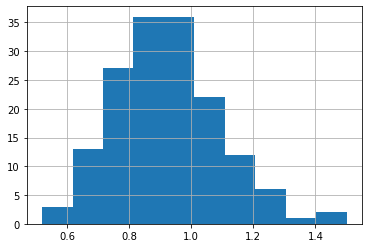

In [134]:
subdf['outcome'].hist()

The data looks roughly normally distributed, allowing us to consider using ANOVA.

## A7.26(b)

In [141]:
summary = pd.DataFrame()
gb = subdf.groupby('treatment')

summary['Sample Size'] = gb.count()
summary['Mean'] = gb.mean()
summary['Std Dev'] = gb.std()
summary['Min'] = gb.min()
summary['Q1'] = gb.quantile(.25)
summary['Q3'] = gb.quantile(.75)
summary['Max'] = gb.max()

summary.round(3)

,Sample Size,Mean,Std Dev,Min,Q1,Q3,Max
treatment,,,,,,,
Drug,58,0.813,0.152,0.520,0.716,0.875,1.500
NoDrug,50,1.012,0.157,0.630,0.921,1.109,1.478
Placebo,50,0.963,0.118,0.719,0.896,1.028,1.217


## A7.26(c)

In [164]:
n = summary['Sample Size'].sum()
k = 3
mean = (summary['Sample Size'] * summary['Mean']).sum() / n

SSW = ((summary['Sample Size'] - 1) * summary['Std Dev'] ** 2).sum()
SSB = (summary['Sample Size'] * (summary['Mean'] - mean) ** 2).sum()
MSW = SSW / (n - k)
MSB = SSB / (k - 1)
F = MSB / MSW
pval = stats.f(k-1, n-k).sf(F)

anova = pd.DataFrame()
anova.loc['Between', 'Sum Sq'] = SSB
anova.loc['Within', 'Sum Sq'] = SSW
anova.loc['Total', 'Sum Sq'] = SSB + SSW
anova.loc['Between', 'df'] = k - 1
anova.loc['Within', 'df'] = n - k
anova.loc['Total', 'df'] = n - 1
anova.loc['Within', 'Sum Sq'] = SSW
anova.loc['Between', 'Mean Sq'] = MSB
anova.loc['Within', 'Mean Sq'] = MSW
anova.loc['Between', 'F Statistic'] = F
anova.loc['Between', 'p-value'] = pval

anova

,Sum Sq,df,Mean Sq,F Statistic,p-value
Between,1.181160,2.0,0.590580,28.505567,2.870183e-11
Within,3.211299,155.0,0.020718,NaN,NaN
Total,4.392459,157.0,NaN,NaN,NaN


## A7.26(d)

In [158]:
pairs = [
    ['Drug', 'NoDrug'],
    ['Drug', 'Placebo'],
    ['NoDrug', 'Placebo'],
]

print("Tukey adjusted p-values\n-----------------------")
for trt1, trt2 in pairs:
    n1 = summary.loc[trt1, 'Sample Size']
    n2 = summary.loc[trt2, 'Sample Size']

    diff = abs(summary.loc[trt1, 'Mean'] - summary.loc[trt2, 'Mean'])
    se = np.sqrt(MSW * (1 / n1 + 1 / n2) / 2)

    pval = stats.studentized_range(k, n-k).sf(diff / se)
    pair_string = f"{trt1 :6} vs. {trt2}"
    print(f"{pair_string :18} : {pval :.4}")

Tukey adjusted p-values
-----------------------
Drug   vs. NoDrug  : 8.539e-11
Drug   vs. Placebo : 6.911e-07
NoDrug vs. Placebo : 0.2095
